In [111]:
from sklearn.datasets import load_iris

iris = load_iris()
print(f'classes: {iris.target_names}')
print(f'attributes: {iris.feature_names}')
M = len(iris.data)
print(f'Number of instances: {M}')

classes: ['setosa' 'versicolor' 'virginica']
attributes: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Number of instances: 150


# Algorithm 1R - Classification rules

In [112]:
import pandas as pd
import numpy as np

def find_most_frequent_classes(class_index):
    class_frequencies = {}
    for instance in zip(iris.data, iris.target):
        if instance[0][class_index] in class_frequencies:
            class_frequencies[instance[0][class_index]][instance[1]] = class_frequencies[instance[0][class_index]][instance[1]] + 1
            class_frequencies[instance[0][class_index]][3] = np.argmax(class_frequencies[instance[0][class_index]][0:3])
        else:
            new_freq = {
                    instance[0][class_index]: [0, 0, 0, 0]
                }
            new_freq[instance[0][class_index]][instance[1]] = new_freq[instance[0][class_index]][instance[1]] + 1
            new_freq[instance[0][class_index]][3] = np.argmax(new_freq[instance[0][class_index]][0:3])
            class_frequencies.update(new_freq)
    df_freq = pd.DataFrame.from_dict(class_frequencies).transpose().sort_index()
    return df_freq.rename(columns={3: "most_frequent"})

In [113]:
df_class_0 = find_most_frequent_classes(0)
df_class_0

,0,1,2,most_frequent
4.3,1,0,0,0
4.4,3,0,0,0
4.5,1,0,0,0
4.6,4,0,0,0
4.7,2,0,0,0
4.8,5,0,0,0
4.9,4,1,1,0
5.0,8,2,0,0
5.1,8,1,0,0
5.2,3,1,0,0


In [114]:
df_class_1 = find_most_frequent_classes(1)
df_class_1

,0,1,2,most_frequent
2.0,0,1,0,1
2.2,0,2,1,1
2.3,1,3,0,1
2.4,0,3,0,1
2.5,0,4,4,1
2.6,0,3,2,1
2.7,0,5,4,1
2.8,0,6,8,2
2.9,1,7,2,1
3.0,6,8,12,2


In [115]:
row = 0
column = 0
matrix = np.zeros((len(df_class_1), len(df_class_0)))
import random

for class_0_index in df_class_0.index:
    class_0_element = df_class_0.loc[class_0_index]
    row = 0
    for class_1_index in df_class_1.index:
        class_1_element = df_class_1.loc[class_1_index]
        max_class_0 = class_0_element['most_frequent']
        max_class_1 = class_1_element['most_frequent']
        matrix[row][column] =  max_class_0 if class_0_element[max_class_0] > class_1_element[max_class_1] else max_class_1
        matrix[row][column] =  random.randint(0, 1) if class_0_element[max_class_0] == class_1_element[max_class_1] else matrix[row][column]
        row = row + 1
    column = column + 1

The column labels are the feature 0 values, and the row indexes are the feature 1 values

In [116]:
df_matrix_rules = pd.DataFrame(matrix, columns = df_class_0.index.values.tolist()).set_index(pd.Index(df_class_1.index.values.tolist()))
df_matrix_rules

,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0,5.1,5.2,...,6.8,6.9,7.0,7.1,7.2,7.3,7.4,7.6,7.7,7.9
2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,0.0,1.0,2.0,0.0,0.0,1.0,2.0,1.0
2.2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0
2.3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,2.0,1.0
2.4,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
2.5,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2.6,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
2.7,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2.8,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2.9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [117]:
def predict_class(instance):
    return df_matrix_rules.loc[instance[1]][instance[0]].astype(int)

In [118]:
from sklearn import metrics

y_pred_list = []
for instance in iris.data:
    y_pred = predict_class(instance)
    y_pred_list.append(y_pred)

score = 0
for output in zip(y_pred_list, iris.target.tolist()):
    score = (score + 1) if output[0] == output[1] else score
score = score / len(iris.data)
print(f'Score: {score}')
print(f'Resubstitution error: {1-score}')
print(f'Accuracy: {metrics.accuracy_score(iris.target.tolist(), y_pred_list)}')

Score: 0.5733333333333334
Resubstitution error: 0.42666666666666664
Accuracy: 0.5733333333333334


# Decision Tree Classifier

In [119]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import tree

iris = load_iris()
print(f'Classes: {iris.target_names}')

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0)

decision_tree = tree.DecisionTreeClassifier(random_state = 0)

decision_tree.fit(X_train, y_train)

Classes: ['setosa' 'versicolor' 'virginica']


DecisionTreeClassifier(random_state=0)

In [120]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
def compute_metrics(model):
    y_pred = model.predict(X_test)
    score = 0
    for output in zip(y_pred, y_test):
        score = (score + 1) if output[0] == output[1] else score
    score = score / len(y_test)
    print(f'Score: {score}')

    print(f'Training score: {model.score(X_train, y_train)}')
    print(f'Test score: {model.score(X_test, y_test)}')
    print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred)}')
    print(f'Precision per class: {metrics.precision_score(y_test, y_pred, average = None)}')
    print(f'Recall per class: {metrics.recall_score(y_test, y_pred, average = None)}')
    print(f'F1-score per class: {metrics.f1_score(y_test, y_pred, average = None)}')

    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
    disp.plot()
    plt.show()

Score: 0.9736842105263158
Training score: 1.0
Test score: 0.9736842105263158
Accuracy: 0.9736842105263158
Precision per class: [1.  1.  0.9]
Recall per class: [1.     0.9375 1.    ]
F1-score per class: [1.         0.96774194 0.94736842]


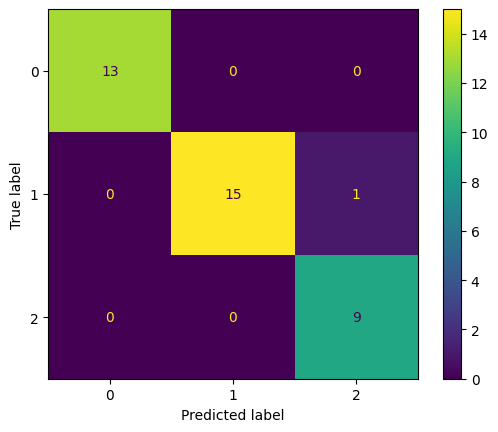

In [121]:
compute_metrics(decision_tree)

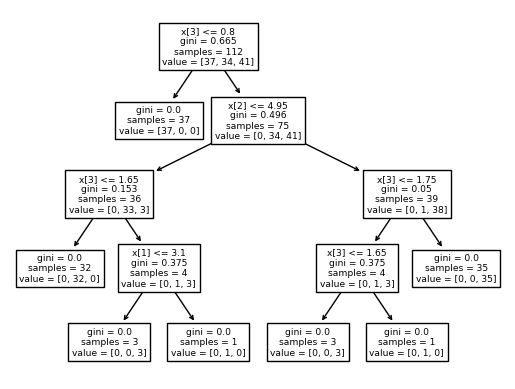

In [122]:
decision_path = decision_tree.decision_path(iris.data)
tree.plot_tree(decision_tree)
plt.show()

# Logistic Regression Classifier

In [123]:
import sklearn.datasets as data
import sklearn.model_selection as model_select
import sklearn.linear_model as linear_model

iris = data.load_iris()

X = iris.data[:, :2]
y = iris.target
X_train, X_test, y_train, y_test = model_select.train_test_split(X[:, :2], y, random_state = 0)

logistic_regression = linear_model.LogisticRegression(solver = 'lbfgs', multi_class='multinomial')
logistic_regression.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

Score: 0.7894736842105263
Training score: 0.8392857142857143
Test score: 0.7894736842105263
Accuracy: 0.7894736842105263
Precision per class: [1.         0.78571429 0.54545455]
Recall per class: [1.         0.6875     0.66666667]
F1-score per class: [1.         0.73333333 0.6       ]


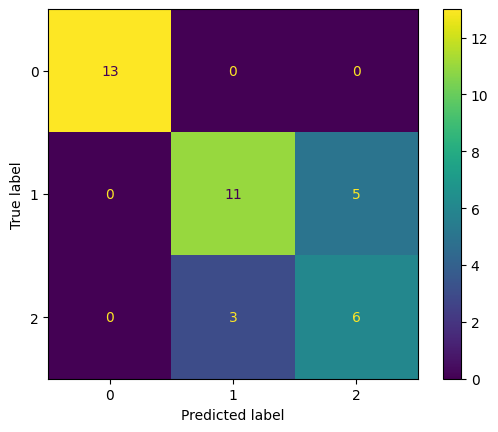

In [124]:
compute_metrics(logistic_regression)

Mesh score: 1.0


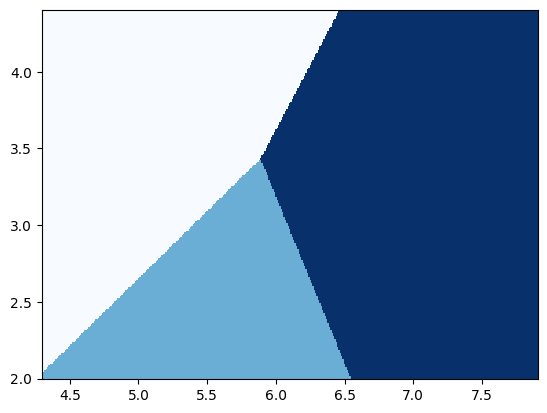

In [162]:
step_size = 0.01
min_x = 4.3
max_x = 7.9
min_y = 2.0
max_y = 4.4
x = np.arange(min_x, max_x, step_size)
y = np.arange(min_y, max_y, step_size)
num_x = len(y)
num_y = len(x)

x_mesh, y_mesh = np.meshgrid(x, y)
X_pairs = []
for i in range(0, len(y)):
    for j in range(0, len(x)):
        X_pairs.append([x_mesh[i][j], y_mesh[i][j]])
        
y_pred_pairs = logistic_regression.predict(X_pairs)
print(f'Mesh score: {logistic_regression.score(X_pairs, y_pred_pairs)}')

y_pred_mesh = y_pred_pairs.reshape(x_mesh.shape)
plt .set_cmap('Blues')
plt.pcolormesh(x_mesh, y_mesh, y_pred_mesh)
plt.show()


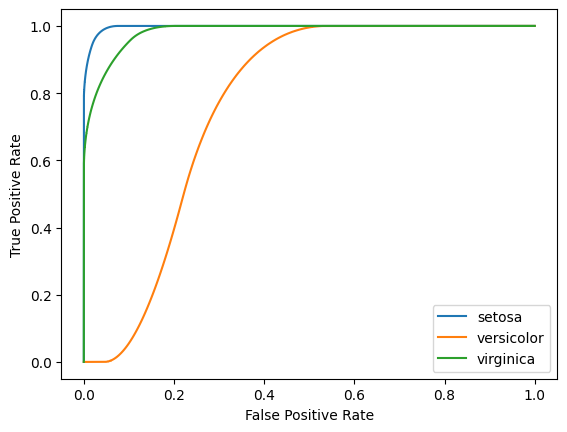

In [190]:
import sklearn.preprocessing as preprocess
import sklearn.metrics as metrics
%matplotlib inline

conf_scores = logistic_regression.decision_function(X_pairs)
y = iris.target
y_binary = preprocess.label_binarize(y_pred_pairs, classes=sorted(set(y)))

false_positive_rate = dict()
true_positive_rate = dict()

num_classes = 3
for c in range(num_classes):
    false_positive_rate[c], true_positive_rate[c], _ = metrics.roc_curve(y_binary[:, c], conf_scores[:, c])

for c in range(num_classes):
    plt.plot(false_positive_rate[c], true_positive_rate[c], label=iris.target_names[c])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [186]:
y

array([2.  , 2.01, 2.02, 2.03, 2.04, 2.05, 2.06, 2.07, 2.08, 2.09, 2.1 ,
       2.11, 2.12, 2.13, 2.14, 2.15, 2.16, 2.17, 2.18, 2.19, 2.2 , 2.21,
       2.22, 2.23, 2.24, 2.25, 2.26, 2.27, 2.28, 2.29, 2.3 , 2.31, 2.32,
       2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4 , 2.41, 2.42, 2.43,
       2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53, 2.54,
       2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64, 2.65,
       2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75, 2.76,
       2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.87,
       2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97, 2.98,
       2.99, 3.  , 3.01, 3.02, 3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.09,
       3.1 , 3.11, 3.12, 3.13, 3.14, 3.15, 3.16, 3.17, 3.18, 3.19, 3.2 ,
       3.21, 3.22, 3.23, 3.24, 3.25, 3.26, 3.27, 3.28, 3.29, 3.3 , 3.31,
       3.32, 3.33, 3.34, 3.35, 3.36, 3.37, 3.38, 3.39, 3.4 , 3.41, 3.42,
       3.43, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49, 3.